# Evergreen Forest Products Inc.

In [1]:
import pandas as pd
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Evergreen Forest Products Inc.csv')

In [4]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT
0,FREIGHT COLLECT 168 PIECES ROUGH SAWN GREENHEA...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,VARIETY WOODS GREENHEART LTD,05/19/2025,60522,27510,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,EFPIPO 55649/ 55660/55637/55644 /POG/WAXED ENDS,"PO BOX 922 578 SOUND AVENUE WADING RIVER, NY 1...",99 LALUNI STREET QUEENSTOWN GEORGETOWN GUYANA,11792,1,TCNU5608977,4500,195,PCS,0,CM,CMDUCUY0114170,,,0UAKB,C7950498 CETO381025,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,"PO BOX 922 578 SOUND AVENUE WADING RIVER, NY 1...","GEORGETOWN, GY"
1,GREENHEART PILES GREENHEART PILES GREENHEART P...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,489276,222398,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS NO MARKS NO MARKS NO MARKS NO MARKS N...,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,9,GESU6681360 TCKU6230341 TGHU9487047 APHU725592...,4500 4500 4500 4500 4500 4500 4500 4500 4500,261,PCS,1,CM,CMDUCUY0114182,,,0UAKB,C7725346 C7725348 C7725342 C7956023 C7725347 C...,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY"
2,FREIGHT COLLECT GREENHEART LUMBER,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,57875,26307,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,1,CMAU5991381,4500,58,PCS,0,CM,CMDUCUY0114259,,,0UAKB,C7725349,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY"
3,FREIGHT COLLECT GREENHEART LUMBER,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,56038,25472,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,1,TLLU4376564,4500,157,PCS,0,CM,CMDUCUY0114181,,,0UAKB,C7956021,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY"
4,WASHIBA LUMBER FREIGHT COLLECT FREIGHT COLLECT...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,102744,46702,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,2,TCLU7994573 APZU4760593,4500 4200,1497,PCS,0,CM,CMDUCUY0114183,,,0UAKB,C7725550 C7725436,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY"


In [86]:
import re

In [87]:
df['YEAR'] = df['ARRIVAL DATE'].str.extract(r'\d{2}/\d{2}/(\d{4})')

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df['SHIPPER'].value_counts()

SHIPPER
NAZIR TROPICAL TIMBERS                 209
SOUTHERN TIMBER EXPORTS                 70
EVERGREEN FOREST PRODUCTS INC.          46
TRADE-LINC                              43
R & H JAISINGH                          40
VARIETY WOODS & GREENHEART LTD          22
COMPENSADOS NM LTDA                     18
VARIETY WOODS & GREENHEART LIMITED      17
VARIETY WOODS GREENHEART LTD            17
SUPERIOR WOODS                          15
ANDRADE & MARTINS LTDA                  13
DOODNAUTH NAIPAUL                       12
FOREST WOODS INC.                       12
GREEN LINE PRODUCTS ENTERPRISE INC.     11
GUYLOG                                  11
TRADE LINC                              11
INTERIOR FOREST INDUSTRIES LTD.         11
DURABLE WOOD PRODUCTS ENT.              10
GUYANA FURNITURE MANUFACTURING LTD       9
SUSTAINABLE FOREST PRODUCTS INC          8
TOOLSIE PERSAUD LIMITED                  8
GUYANA FURNITURE MANUFACTURING           7
RANDA IND. E COM. PORTAS E COM.          5
RON

In [6]:
# Step 1: Normalize text (lowercase, remove punctuation, strip spaces)
def normalize(name):
    name = name.upper()
    name = re.sub(r'[.,\-\/]', '', name)
    name = re.sub(r'\s+', ' ', name)
    name = name.strip()
    return name

In [7]:
df['SHIPPER_CLEANED'] = df['SHIPPER'].apply(normalize)

In [10]:
name_map = {
    # Variety Woods & Greenheart
    'VARIETY WOODS & GREENHEART LIMITED': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART LTD': 'Variety Woods & Greenheart',
    'VARIETY WOODS GREENHEART LTD': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART LIMITE': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART LTD.': 'Variety Woods & Greenheart',

    # Durable Wood Products
    'DURABLE WOOD PRODUCTS ENT': 'Durable Wood Products Enterprises',
    'DURABLE WOOD PRODUCTS ENT.': 'Durable Wood Products Enterprises',
    'DURABLE WOOD PRODUCTS ENTERPRISES': 'Durable Wood Products Enterprises',
    'DURABLE WOOD PRODUCTS ENTERPRISE': 'Durable Wood Products Enterprises',

    # Trade-Linc
    'TRADE-LINC': 'Trade-Linc',
    'TRADELINC': 'Trade-Linc',
    'TRADE LINC': 'Trade-Linc',

    # Toolsie Persaud
    'TOOLSIE PERSAUD LIMITED': 'Toolsie Persaud Limited/Interior Forest Industries',
    'TOOLSIE PERSAUD LTD': 'Toolsie Persaud Limited/Interior Forest Industries',
    'INTERIOR FOREST INDUSTRIES LTD': 'Toolsie Persaud Limited/Interior Forest Industries',
    'INTERIOR FOREST INDUSTRIES LTD.': 'Toolsie Persaud Limited/Interior Forest Industries',
    'INTERIOR FOREST INDUSTRIES': 'Toolsie Persaud Limited/Interior Forest Industries',

    # Evergreen Forest Products
    'EVERGREEN FOREST PRODUCTS INC': 'Evergreen Forest Products',
    'EVERGREEN FOREST PRODUCTS INC.': 'Evergreen Forest Products',
    'EVERGREEN FOREST PRODUCT INC': 'Evergreen Forest Products',

    # Forest Woods
    'FOREST WOODS INC.': 'Forest Woods Inc.',
    'FOREST WOODS INC': 'Forest Woods Inc.',

    # Green Line Products
    'GREEN LINE PRODUCTS ENTERPRISE INC.': 'Green Line Products Enterprise Inc.',
    'GREEN LINE PRODUCTS ENT INC': 'Green Line Products Enterprise Inc.',
    'GREEN LINE PRODUCTS ENT. INC': 'Green Line Products Enterprise Inc.',

    # Andrade & Martins
    'ANDRADE & MARTINS LTDA': 'Andrade & Martins Ltda',
    'ANDRADE & MARTINS LTDA.': 'Andrade & Martins Ltda',
    'ANDRADE AND MARTINS LTDA': 'Andrade & Martins Ltda',

    # Compensados NM
    'COMPENSADOS NM LTDA': 'Compensados NM Ltda',

    # Randa
    'RANDA IND. E COM. PORTAS E COM.': 'Randa Indústria e Comércio de Portas',
    'RANDA IND. E COM. PORTAS E': 'Randa Indústria e Comércio de Portas',
    'RANDA IND.E COM.PORTAS ECOMPENSADOS': 'Randa Indústria e Comércio de Portas',
    'RANDA INDU E COM DE PORTAS E COMP': 'Randa Indústria e Comércio de Portas',
    'RANDA IND E COM DE PORTAS E COMP': 'Randa Indústria e Comércio de Portas',
    'RANDA IND E COM PORTAS E COMP': 'Randa Indústria e Comércio de Portas',

    # Celplac
    'CELPLAC INDUSTRIA E COMERCIO LTDA': 'Celplac Indústria e Comércio Ltda',
    'CELPLAC INDUSTRIA E COMERCIO EIRELI': 'Celplac Indústria e Comércio Ltda',
    'CELPLAC INDUSTRIA E COMERCIO': 'Celplac Indústria e Comércio Ltda',

    # Marini
    'MARINI INDUSTRIA DE COMPENSADOS': 'Marini Indústria de Compensados Ltda',
    'MARINI INDUSTRIA DE COMPENSADOS LTD': 'Marini Indústria de Compensados Ltda',

    # Guyana Furniture Manufacturing
    'GUYANA FURNITURE MANUFACTURING': 'Guyana Furniture Manufacturing Ltd.',
    'GUYANA FURNITURE MANUFACTURING LTD': 'Guyana Furniture Manufacturing Ltd.',

    # Compensados Drabecki
    'COMPENSADOS DRABECKI LTDA.': 'Compensados Drabecki Ltda',

    # Other matchable names
    'SUPERIOR WOODS': 'Superior Woods',
    'DOODNAUTH NAIPAUL': 'Doodnauth Naipaul',
    'GUYLOG': 'Guylog',
    'CUMMINGS WOOD PRODUCTS': 'Cummings Wood Products',
    'WEYERHAEUSER PRODUCTOS S.A.': 'Weyerhaeuser Productos S.A.',
    'WEYERHAEUSER URUGUAY S.A.': 'Weyerhaeuser Uruguay S.A.',
    'PARADISE WOODS': 'Paradise Woods',
    'DEORAJ SINGH SAWMILL': 'Deoraj Singh Sawmill',
    'BR TIMBER INDUSTRIA E COMERCIO LTDA': 'BR Timber Indústria e Comércio Ltda',
    'LINYI BAIDELI INTERNATIONAL TRADE': 'Linyi Baideli International Trade',
    'PINUSTAN IND COM DE MADEIRAS': 'Pinustan Indústria e Comércio de Madeiras',
    'GREEN LINK INTERNATIONAL CORP': 'Green Link International Corp',
    'MADEIREIRA RIO CLARO LTDA': 'Madeireira Rio Claro Ltda',
    'BARAMA COMPANY LIMITED': 'Barama Company Limited',
    'G13 MADEIRAS LTDA': 'G13 Madeiras Ltda',
    'UPPER BERBICE FOREST AND': 'Upper Berbice Forest',
    'EMERALD FOREST INC.': 'Emerald Forest Inc.',
    'BULKAN TIMBER WORKS INC.': 'Bulkan Timber Works Inc.',
    'WIDEVELOP INT LTD': 'Widevelop Int Ltd',
    'SHANDONG HUAXIN JIASHENG WOOD': 'Shandong Huaxin Jiasheng Wood',
    'SHANDONG HUAXIN JIASHENG': 'Shandong Huaxin Jiasheng Wood',
    'WINWIN WOODS INTERNATIONAL CORP.': 'Winwin Woods International Corp.',
    'LINYI JIAHE WOOD INDUSTRY CO.,LTD.': 'Linyi Jiahe Wood Industry Co., Ltd.',
    'PURUNI WOOD PRODUCTS INC': 'Puruni Wood Products Inc',
    'VALE NORTE INDUSTRIAL MERCANTIL': 'Vale Norte Industrial Mercantil',
    'ITUNI SMALL LOGGERS ASSOCIATION': 'Ituni Small Loggers Association',
    'PRESTIGE TIMBERS INC': 'Prestige Timbers Inc',
    'HEBEI SHUOWEI MACHINERY EQUIPMENT C': 'Hebei Shuowei Machinery Equipment Co.',
    'GANSHYAM MAHASE': 'Ganshyam Mahase',
    'GANSHYAM MAHASE SAWMILL AND': 'Ganshyam Mahase Sawmill and Lumber',
    'G MAHASE & MAHASE LUMBER SUPPLIER': 'G Mahase & Mahase Lumber Supplier',
    'TULSA S.A.': 'Tulsa S.A.',
    'RONDONIA RURAL AGROINDUSTRIAL LTDA': 'Rondônia Rural Agroindustrial Ltda',
    'RONDONIA RURAL AGROINDUSTRIAL': 'Rondônia Rural Agroindustrial Ltda',
    'RONDONIA RURAL AGRO LTDA': 'Rondônia Rural Agroindustrial Ltda',
    'INDUSTRIA DE COMPENSADOS SUDATI LTD': 'Indústria de Compensados Sudati Ltda',
    'PLACA COM. DE MAD. E COMP.LTDA': 'Placa Comércio de Madeira e Compensados Ltda',
    'S & K LUMBER ENTERPRISE': 'S & K Lumber Enterprise',
    
    # Top-level companies needing no standardization
    'NAZIR TROPICAL TIMBERS': 'Nazir Tropical Timbers',
    'SOUTHERN TIMBER EXPORTS': 'Southern Timber Exports',
    'R & H JAISINGH': 'R & H Jaisingh',
}

In [11]:
# Step 3: Map normalized names to unified names
df['SHIPPER_CLEANED'] = df['SHIPPER_CLEANED'].replace(name_map)

In [12]:
# Step 4: Group and sum by cleaned name
df.groupby('SHIPPER_CLEANED').size().reset_index(name='Total Count').sort_values(by='Total Count', ascending=False)

,SHIPPER_CLEANED,Total Count
32,Nazir Tropical Timbers,209
47,Southern Timber Exports,70
54,Variety Woods & Greenheart,58
51,Trade-Linc,55
13,Evergreen Forest Products,51
38,R & H Jaisingh,40
50,Toolsie Persaud Limited/Interior Forest Indust...,25
7,Compensados NM Ltda,18
14,Forest Woods Inc.,17
0,Andrade & Martins Ltda,17


In [13]:
df['SHIPPER_COUNTRY'] = 'Guyana'

In [15]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT,SHIPPER_CLEANED,SHIPPER_COUNTRY
0,FREIGHT COLLECT 168 PIECES ROUGH SAWN GREENHEA...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,VARIETY WOODS GREENHEART LTD,05/19/2025,60522,27510,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,EFPIPO 55649/ 55660/55637/55644 /POG/WAXED ENDS,"PO BOX 922 578 SOUND AVENUE WADING RIVER, NY 1...",99 LALUNI STREET QUEENSTOWN GEORGETOWN GUYANA,11792,1,TCNU5608977,4500,195,PCS,0,CM,CMDUCUY0114170,,,0UAKB,C7950498 CETO381025,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,"PO BOX 922 578 SOUND AVENUE WADING RIVER, NY 1...","GEORGETOWN, GY",Variety Woods & Greenheart,Guyana
1,GREENHEART PILES GREENHEART PILES GREENHEART P...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,489276,222398,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS NO MARKS NO MARKS NO MARKS NO MARKS N...,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,9,GESU6681360 TCKU6230341 TGHU9487047 APHU725592...,4500 4500 4500 4500 4500 4500 4500 4500 4500,261,PCS,1,CM,CMDUCUY0114182,,,0UAKB,C7725346 C7725348 C7725342 C7956023 C7725347 C...,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana
2,FREIGHT COLLECT GREENHEART LUMBER,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,57875,26307,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,1,CMAU5991381,4500,58,PCS,0,CM,CMDUCUY0114259,,,0UAKB,C7725349,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana
3,FREIGHT COLLECT GREENHEART LUMBER,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,56038,25472,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,1,TLLU4376564,4500,157,PCS,0,CM,CMDUCUY0114181,,,0UAKB,C7956021,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana
4,WASHIBA LUMBER FREIGHT COLLECT FREIGHT COLLECT...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,102744,46702,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,2,TCLU7994573 APZU4760593,4500 4200,1497,PCS,0,CM,CMDUCUY0114183,,,0UAKB,C7725550 C7725436,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana


In [79]:
#df['PRODUCT DESCRIPTION'].value_counts()

In [17]:
df['baromalli'] = df['PRODUCT DESCRIPTION'].str.contains('BAROMALLI', regex=True, case=False, na=False)

In [18]:
df['birch'] = df['PRODUCT DESCRIPTION'].str.contains('BIRCH', regex=True, case=False, na=False)

In [19]:
df['kakaralli'] = df['PRODUCT DESCRIPTION'].str.contains('KAKARALLI', regex=True, case=False, na=False)

In [20]:
df['bulletwood'] = df['PRODUCT DESCRIPTION'].str.contains('bulletwood|bullet wood', regex=True, case=False, na=False)

In [21]:
df['burada'] = df['PRODUCT DESCRIPTION'].str.contains('burada', regex=True, case=False, na=False)

In [30]:
df['cara euc'] = df['PRODUCT DESCRIPTION'].str.contains('cara euc|euc', regex=True, case=False, na=False)

In [23]:
df['cara pino'] = df['PRODUCT DESCRIPTION'].str.contains('cara pino', regex=True, case=False, na=False)

In [24]:
df['cedar'] = df['PRODUCT DESCRIPTION'].str.contains('cedar', regex=True, case=False, na=False)

In [31]:
df['greenheart'] = df['PRODUCT DESCRIPTION'].str.contains('greenheart|chlorocardium|ocotea', regex=True, case=False, na=False)

In [26]:
df['crabwood'] = df['PRODUCT DESCRIPTION'].str.contains('crabwood', regex=True, case=False, na=False)

In [27]:
df['dakama'] = df['PRODUCT DESCRIPTION'].str.contains('dakama', regex=True, case=False, na=False)

In [28]:
df['darina'] = df['PRODUCT DESCRIPTION'].str.contains('darina', regex=True, case=False, na=False)

In [29]:
df['wamaradan'] = df['PRODUCT DESCRIPTION'].str.contains('wamaradan|dicorynia guianensis', regex=True, case=False, na=False)

In [32]:
df['kabukalli'] = df['PRODUCT DESCRIPTION'].str.contains('kabukalli', regex=True, case=False, na=False)

In [33]:
df['limonaballi'] = df['PRODUCT DESCRIPTION'].str.contains('limonaballi', regex=True, case=False, na=False)

In [34]:
df['locust'] = df['PRODUCT DESCRIPTION'].str.contains('locust', regex=True, case=False, na=False)

In [35]:
df['mora'] = df['PRODUCT DESCRIPTION'].str.contains('mora', regex=True, case=False, na=False)

In [39]:
df['purpleheart'] = df['PRODUCT DESCRIPTION'].str.contains('purpleheart|peltogyne', regex=True, case=False, na=False)

In [37]:
df['pine'] = df['PRODUCT DESCRIPTION'].str.contains('pine', regex=True, case=False, na=False)

In [38]:
df['cuiabano pine'] = df['PRODUCT DESCRIPTION'].str.contains('cuiabano', regex=True, case=False, na=False)

In [40]:
df['shibadan'] = df['PRODUCT DESCRIPTION'].str.contains('shibadan', regex=True, case=False, na=False)

In [41]:
df['tatabu'] = df['PRODUCT DESCRIPTION'].str.contains('tatabu', regex=True, case=False, na=False)

In [42]:
df['tauroniro'] = df['PRODUCT DESCRIPTION'].str.contains('tauroniro', regex=True, case=False, na=False)

In [43]:
df['virola'] = df['PRODUCT DESCRIPTION'].str.contains('virola', regex=True, case=False, na=False)

In [44]:
df['wallaba'] = df['PRODUCT DESCRIPTION'].str.contains('wallaba', regex=True, case=False, na=False)

In [45]:
df['wamara'] = df['PRODUCT DESCRIPTION'].str.contains('wamara', regex=True, case=False, na=False)

In [46]:
df['washiba'] = df['PRODUCT DESCRIPTION'].str.contains('washiba', regex=True, case=False, na=False)

In [47]:
df['yarula'] = df['PRODUCT DESCRIPTION'].str.contains('yarula', regex=True, case=False, na=False)

In [48]:
df['fsc'] = df['PRODUCT DESCRIPTION'].str.contains('fsc', regex=True, case=False, na=False)

In [112]:
df['greenheart_piles'] = df[df['greenheart'] == True]['PRODUCT DESCRIPTION'].str.contains('piles', regex=True, case=False, na=False)

In [33]:
#df.head(50)

In [49]:
df['fsc'].value_counts()

fsc
False    740
Name: count, dtype: int64

In [50]:
df['baromalli'].value_counts()

baromalli
False    737
True       3
Name: count, dtype: int64

In [51]:
df['birch'].value_counts()

birch
False    713
True      27
Name: count, dtype: int64

In [52]:
df['kakaralli'].value_counts()

kakaralli
False    738
True       2
Name: count, dtype: int64

In [53]:
df['bulletwood'].value_counts()

bulletwood
False    735
True       5
Name: count, dtype: int64

In [54]:
df['burada'].value_counts()

burada
False    736
True       4
Name: count, dtype: int64

In [55]:
df['cara euc'].value_counts()

cara euc
False    737
True       3
Name: count, dtype: int64

In [56]:
df['cara pino'].value_counts()

cara pino
False    739
True       1
Name: count, dtype: int64

In [57]:
df['cedar'].value_counts()

cedar
False    736
True       4
Name: count, dtype: int64

In [58]:
df['greenheart'].value_counts()

greenheart
True     568
False    172
Name: count, dtype: int64

In [59]:
df['crabwood'].value_counts()

crabwood
False    737
True       3
Name: count, dtype: int64

In [60]:
df['dakama'].value_counts()

dakama
False    739
True       1
Name: count, dtype: int64

In [61]:
df['darina'].value_counts()

darina
False    722
True      18
Name: count, dtype: int64

In [62]:
df['wamaradan'].value_counts()

wamaradan
False    717
True      23
Name: count, dtype: int64

In [63]:
df['kabukalli'].value_counts()

kabukalli
False    715
True      25
Name: count, dtype: int64

In [64]:
df['limonaballi'].value_counts()

limonaballi
False    738
True       2
Name: count, dtype: int64

In [65]:
df['locust'].value_counts()

locust
False    738
True       2
Name: count, dtype: int64

In [66]:
df['mora'].value_counts()

mora
False    725
True      15
Name: count, dtype: int64

In [67]:
df['purpleheart'].value_counts()

purpleheart
False    680
True      60
Name: count, dtype: int64

In [69]:
df['cuiabano pine'].value_counts()

cuiabano pine
False    739
True       1
Name: count, dtype: int64

In [70]:
df['pine'].value_counts()

pine
False    683
True      57
Name: count, dtype: int64

In [71]:
df['shibadan'].value_counts()

shibadan
False    732
True       8
Name: count, dtype: int64

In [72]:
df['shibadan'].value_counts()

shibadan
False    732
True       8
Name: count, dtype: int64

In [73]:
df['tauroniro'].value_counts()

tauroniro
False    737
True       3
Name: count, dtype: int64

In [74]:
df['virola'].value_counts()

virola
False    739
True       1
Name: count, dtype: int64

In [75]:
df['wallaba'].value_counts()

wallaba
False    727
True      13
Name: count, dtype: int64

In [76]:
df['wamara'].value_counts()

wamara
False    714
True      26
Name: count, dtype: int64

In [77]:
df['washiba'].value_counts()

washiba
False    662
True      78
Name: count, dtype: int64

In [78]:
df['yarula'].value_counts()

yarula
False    738
True       2
Name: count, dtype: int64

### The company primarily imports greenheart. Purpleheart and washiba also appeared in 60-80 imports each. Many other species appear in around 15-20s imports

In [89]:
df.to_csv('evergreen_forest_products_imports_cleaned.csv', index=False)

In [81]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT,SHIPPER_CLEANED,SHIPPER_COUNTRY,baromalli,birch,kakaralli,bulletwood,burada,cara euc,cara pino,cedar,greenheart,crabwood,dakama,darina,wamaradan,kabukalli,limonaballi,locust,mora,purpleheart,pine,cuiabano pine,shibadan,tatabu,tauroniro,virola,wallaba,wamara,washiba,yarula,fsc
0,FREIGHT COLLECT 168 PIECES ROUGH SAWN GREENHEA...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,VARIETY WOODS GREENHEART LTD,05/19/2025,60522,27510,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,EFPIPO 55649/ 55660/55637/55644 /POG/WAXED ENDS,"PO BOX 922 578 SOUND AVENUE WADING RIVER, NY 1...",99 LALUNI STREET QUEENSTOWN GEORGETOWN GUYANA,11792,1,TCNU5608977,4500,195,PCS,0,CM,CMDUCUY0114170,,,0UAKB,C7950498 CETO381025,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,"PO BOX 922 578 SOUND AVENUE WADING RIVER, NY 1...","GEORGETOWN, GY",Variety Woods & Greenheart,Guyana,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,GREENHEART PILES GREENHEART PILES GREENHEART P...,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,489276,222398,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS NO MARKS NO MARKS NO MARKS NO MARKS N...,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,9,GESU6681360 TCKU6230341 TGHU9487047 APHU725592...,4500 4500 4500 4500 4500 4500 4500 4500 4500,261,PCS,1,CM,CMDUCUY0114182,,,0UAKB,C7725346 C7725348 C7725342 C7956023 C7725347 C...,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,FREIGHT COLLECT GREENHEART LUMBER,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,57875,26307,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,1,CMAU5991381,4500,58,PCS,0,CM,CMDUCUY0114259,,,0UAKB,C7725349,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,FREIGHT COLLECT GREENHEART LUMBER,EVERGREEN FOREST PRODUCTS INC,EVERGREEN FOREST PRODUCTS INC,SOUTHERN TIMBER EXPORTS,05/19/2025,56038,25472,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,LOT 53 KERSAINT PARK LA BONNE INTENTION EAST C...,11792,1,TLLU4376564,4500,157,PCS,0,CM,CMDUCUY0114181,,,0UAKB,C7956021,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,EVERGREEN FOREST PRODUCTS INC,578 SOUND AVENUE WADING RIVER 11792 UNITED STATES,"GEORGETOWN, GY",Southern Timber Exports,Guyana,False,False,False,False,False,False,Fa

### No shipments to Evergreen Forest Products are FSC certified. 

## Average weight of each shipment

In [83]:
df.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].mean().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
9,Deoraj Singh Sawmill,158481.666667
42,Randa Indústria e Comércio de Portas,149133.333333
39,RANDA IND E COM PORTAS E,143735.000000
28,Linyi Baideli International Trade,142560.000000
40,RANDA IND E COM PORTAS E COM,136382.000000
25,Indústria de Compensados Sudati Ltda,131386.000000
41,RANDA INDE COMPORTAS ECOMPENSADOS,131250.000000
56,WEYERHAEUSER URUGUAY SA,124570.000000
14,Forest Woods Inc.,106239.235294
34,Paradise Woods,105468.000000


In [84]:
df.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].median().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
9,Deoraj Singh Sawmill,188646.0
42,Randa Indústria e Comércio de Portas,157280.0
39,RANDA IND E COM PORTAS E,143735.0
28,Linyi Baideli International Trade,142560.0
40,RANDA IND E COM PORTAS E COM,131630.0
25,Indústria de Compensados Sudati Ltda,131386.0
41,RANDA INDE COMPORTAS ECOMPENSADOS,131250.0
56,WEYERHAEUSER URUGUAY SA,124570.0
34,Paradise Woods,96450.5
5,COMPENSADOS RELVAPLAC LTDA,82500.0


### Nazir Tropical Timbers is somewhere in the middle. There are some exporters that make much bigger shipments, and others much smaller

In [90]:
avg_weight_per_year = df.groupby(['SHIPPER_CLEANED', 'YEAR'])['GROSS WEIGHT (KG)'].mean().reset_index().pivot(index='SHIPPER_CLEANED', columns='YEAR', values='GROSS WEIGHT (KG)') 

In [91]:
avg_weight_per_year

YEAR,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
SHIPPER_CLEANED,,,,,,,,,,,,,,,
Andrade & Martins Ltda,NaN,NaN,NaN,NaN,NaN,NaN,12421.000000,84933.125000,68710.000000,26878.666667,NaN,NaN,NaN,NaN,NaN
BR Timber Indústria e Comércio Ltda,NaN,NaN,NaN,NaN,NaN,NaN,33771.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BULKAN TIMBER WORKS INC,30048.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barama Company Limited,NaN,NaN,11991.000000,12155.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMPENSADOS DRABECKI LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMPENSADOS RELVAPLAC LTDA,NaN,NaN,NaN,NaN,NaN,NaN,104700.000000,82500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Celplac Indústria e Comércio Ltda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55033.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compensados NM Ltda,NaN,NaN,NaN,NaN,NaN,NaN,81660.000000,62951.166667,97809.363636,NaN,NaN,NaN,NaN,NaN,NaN
Cummings Wood Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22046.000000,21284.500000,26956.000000


In [92]:
avg_weight_per_year.to_csv('evergreen_forest_products_shipments_avg_weight_per_year.csv')

In [94]:
df.dtypes

PRODUCT DESCRIPTION    object
IMPORTER               object
IMPORTER ENTITY        object
SHIPPER                object
ARRIVAL DATE           object
GROSS WEIGHT (LB)       int64
GROSS WEIGHT (KG)       int64
FOREIGN PORT           object
US PORT                object
VESSEL NAME            object
COUNTRY OF ORIGIN      object
MARKS &AMP; NUMBERS    object
CONSIGNEE ADDRESS      object
SHIPPER ADDRESS        object
ZIP CODE               object
NO. OF CONTAINERS       int64
CONTAINER NUMBER       object
CONTAINER TYPE         object
QUANTITY                int64
QUANTITY UNIT          object
MEASUREMENT             int64
MEASUREMENT UNIT       object
BILL OF LADING         object
HOUSE VS MASTER        object
MASTER B/L             object
VOYAGE NUMBER          object
SEAL                   object
SHIP REGISTERED IN     object
IN-BOND ENTRY TYPE     object
CARRIER CODE           object
CARRIER NAME           object
CARRIER CITY           object
CARRIER STATE          object
CARRIER ZI

In [95]:
df.groupby('YEAR')['SHIPPER_COUNTRY'].value_counts()

YEAR  SHIPPER_COUNTRY
2011  Guyana             23
2012  Guyana             52
2013  Guyana             64
2014  Guyana             63
2015  Guyana             44
2016  Guyana             51
2017  Guyana             56
2018  Guyana             75
2019  Guyana             60
2020  Guyana             56
2021  Guyana             23
2022  Guyana             34
2023  Guyana             57
2024  Guyana             54
2025  Guyana             28
Name: count, dtype: int64

## Shipping countries per year

In [96]:
shipping_countries_per_year = df.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column name works for counting rows
    aggfunc='size',
    fill_value=0
)

In [97]:
shipping_countries_per_year

SHIPPER_COUNTRY,Guyana
YEAR,
2011,23
2012,52
2013,64
2014,63
2015,44
2016,51
2017,56
2018,75
2019,60


<Axes: xlabel='YEAR'>

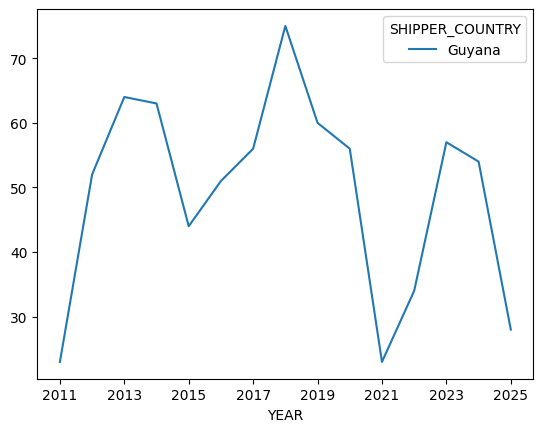

In [98]:
shipping_countries_per_year.plot()

### There was a dip in 2021

## Shipping countries per year for greenheart wood

In [100]:
greenheart_shipping_countries_per_year = df[df['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  
    aggfunc='size',
    fill_value=0
)

In [101]:
greenheart_shipping_countries_per_year

SHIPPER_COUNTRY,Guyana
YEAR,
2011,15
2012,48
2013,48
2014,56
2015,37
2016,46
2017,44
2018,37
2019,42


<Axes: xlabel='YEAR'>

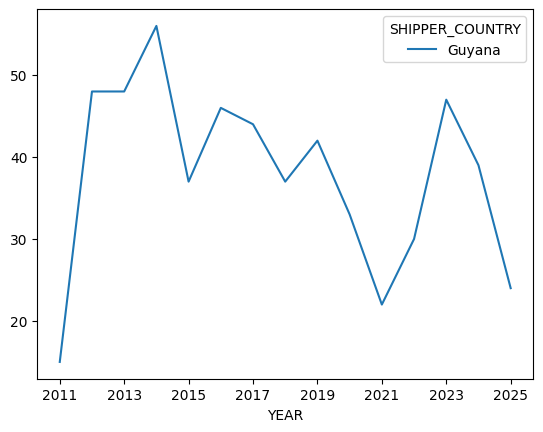

In [103]:
greenheart_shipping_countries_per_year.plot()

## Wood species shipments over the years

In [104]:
# List of boolean wood species columns
species_cols = [
    'birch',
    'kakaralli',
    'bulletwood',
    'burada',
    'cara euc',
    'cara pino',
    'cedar',
    'greenheart',
    'crabwood',
    'dakama',
    'darina',
    'wamaradan',
    'kabukalli',
    'limonaballi',
    'locust',
    'mora',
    'purpleheart',
    'pine',
    'cuiabano pine',
    'shibadan',
    'tatabu',
    'tauroniro',
    'virola',
    'wallaba',
    'wamara',
    'washiba',
    'yarula'
]

In [105]:
# Create the pivot table: YEAR as index, species as columns, values = count of True values
species_per_year = df.groupby('YEAR')[species_cols].sum()

In [106]:
species_per_year

,birch,kakaralli,bulletwood,burada,cara euc,cara pino,cedar,greenheart,crabwood,dakama,darina,wamaradan,kabukalli,limonaballi,locust,mora,purpleheart,pine,cuiabano pine,shibadan,tatabu,tauroniro,virola,wallaba,wamara,washiba,yarula
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,1,0,2,0
2012,0,0,0,0,0,0,0,48,0,1,0,3,0,0,0,0,3,0,0,0,0,1,0,1,3,0,0
2013,7,0,0,0,3,1,0,48,0,0,0,3,1,0,0,0,4,3,0,1,1,2,0,0,3,0,0
2014,2,2,0,4,0,0,0,56,0,0,2,0,4,0,0,3,4,0,0,3,2,0,0,1,0,0,0
2015,0,0,0,0,0,0,0,37,0,0,3,0,0,1,1,4,2,0,0,1,0,0,0,0,1,2,1
2016,0,0,1,0,0,0,0,46,0,0,0,0,0,1,0,3,3,0,0,1,1,0,0,2,1,11,0
2017,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,5,9,1,0,0,0,0,1,0,3,0
2018,9,0,0,0,0,0,2,37,0,0,0,0,0,0,0,0,6,18,0,0,0,0,1,1,0,14,1
2019,3,0,0,0,0,0,0,42,0,0,2,0,0,0,0,3,8,13,0,0,0,0,0,0,0,5,0


In [107]:
import matplotlib.pyplot as plt

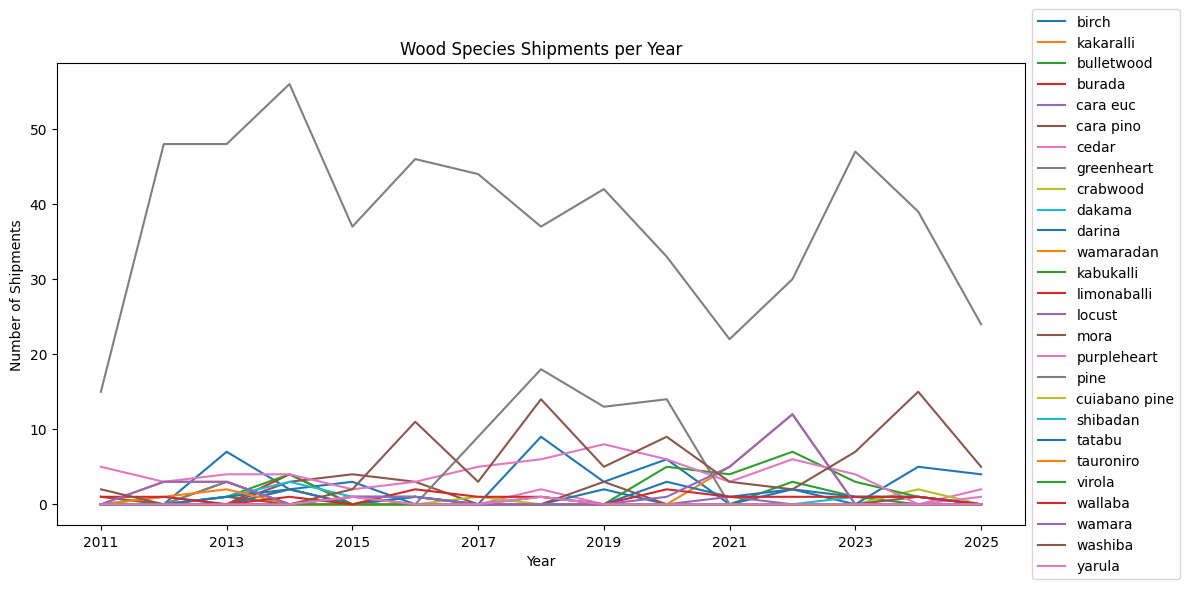

In [108]:
ax = species_per_year.plot(figsize=(12, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Wood Species Shipments per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

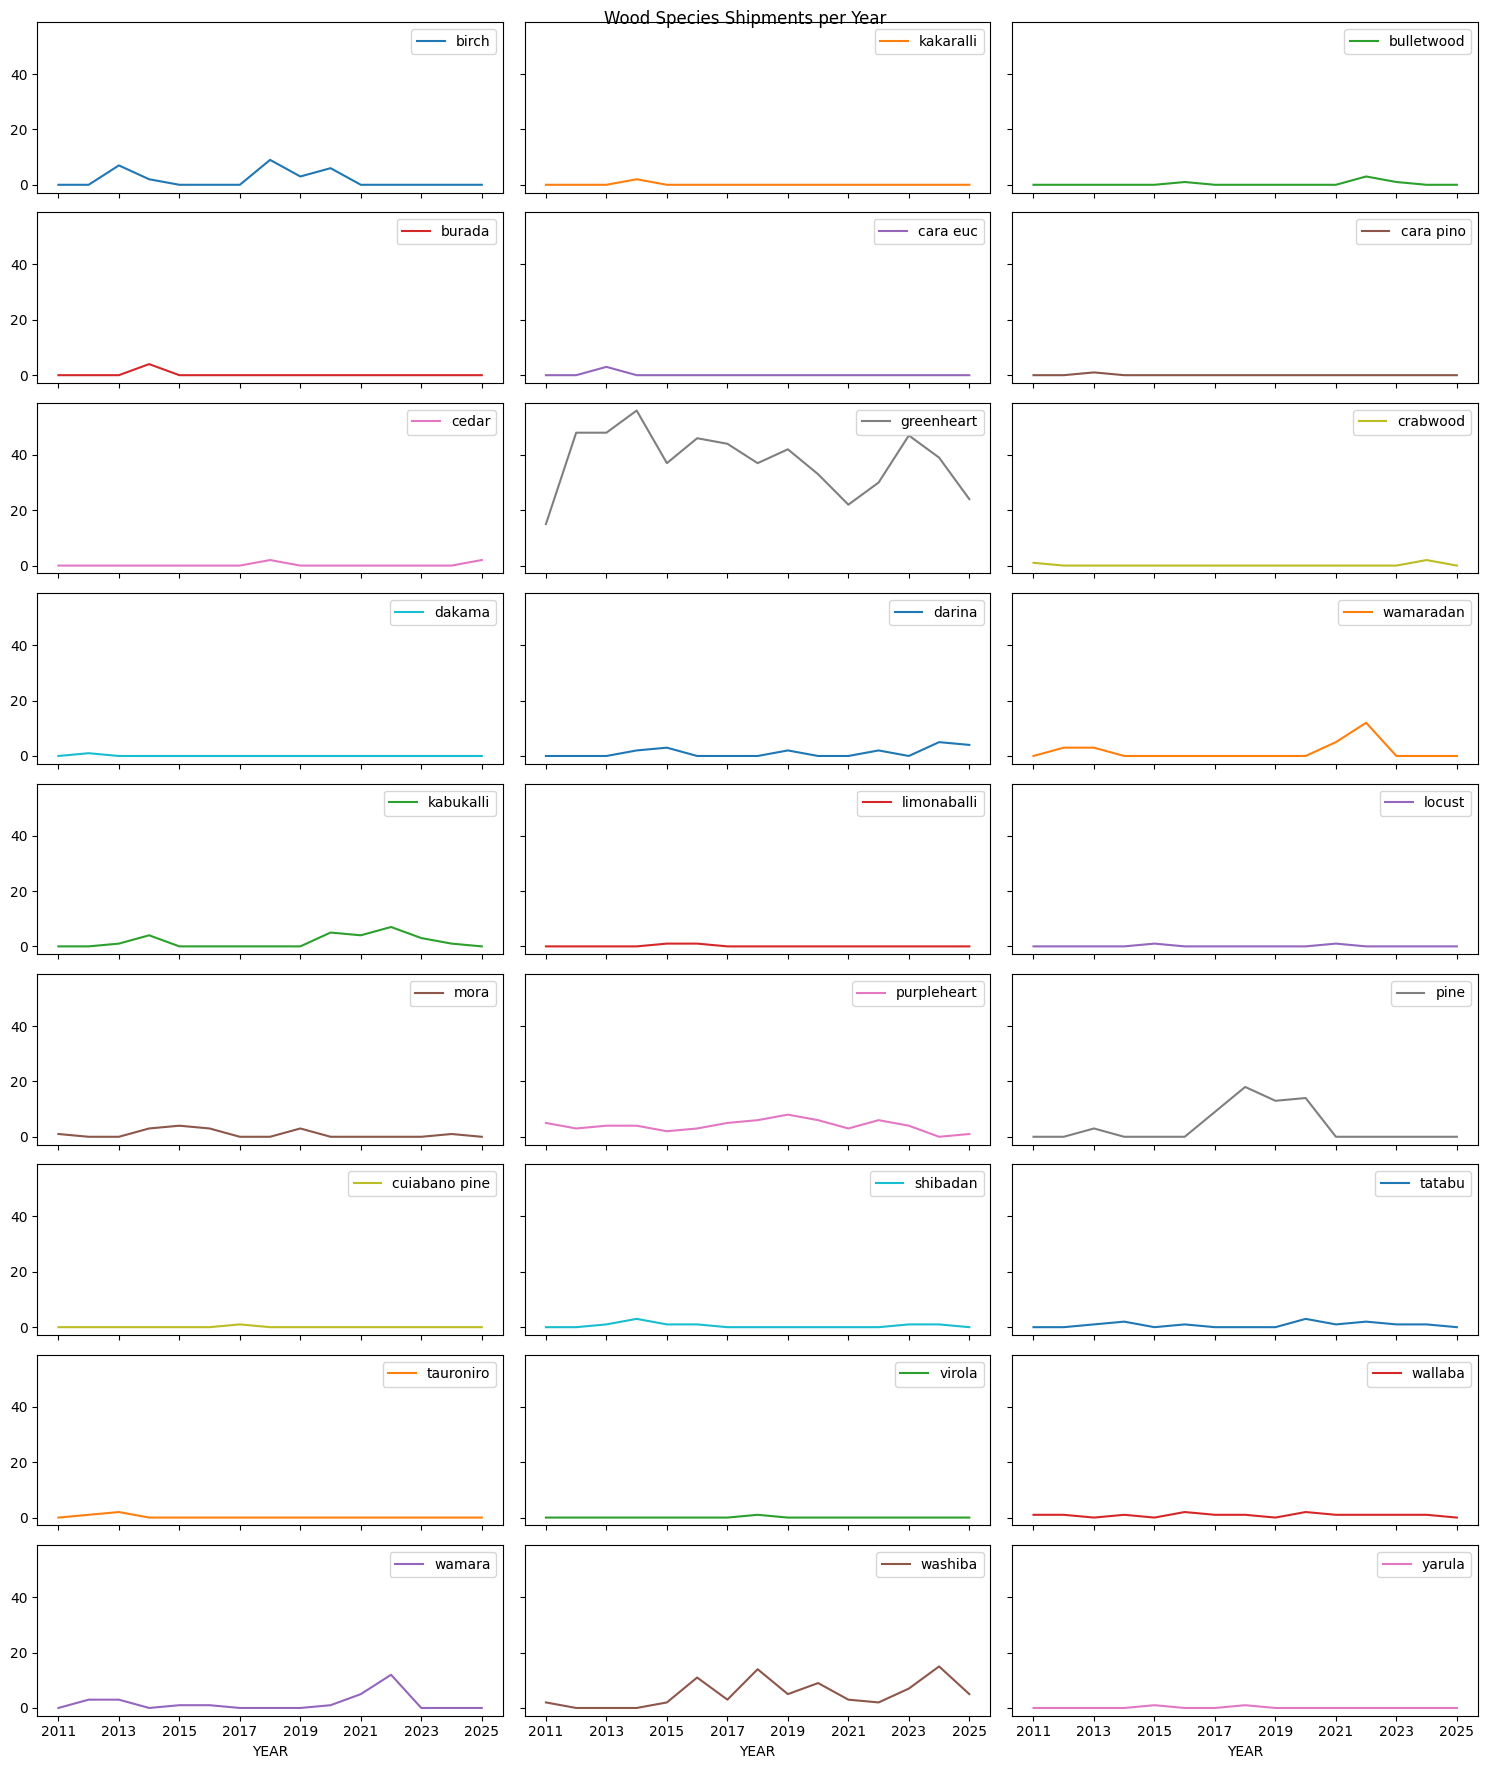

In [110]:
# Create subplots for each species
axes = species_per_year.plot(
    subplots=True,
    layout=(9, 3),  
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Wood Species Shipments per Year'
)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

### Greenheart imports have remained consistently high. Washiba, wamaradan and wamara has also been increasing. 

In [113]:
df[df['greenheart_piles'] == True].groupby('YEAR').size()

YEAR
2011     8
2012    22
2013    16
2014    20
2015    23
2016    31
2017    35
2018    26
2019    30
2020    22
2021    20
2022    21
2023    37
2024    28
2025    12
dtype: int64

## Imports of piles over the years

<Axes: xlabel='YEAR'>

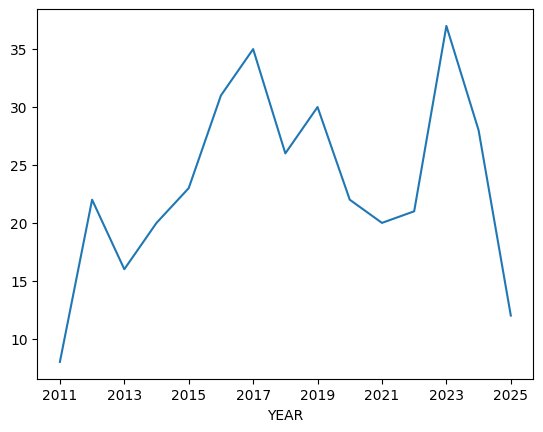

In [114]:
df[df['greenheart_piles'] == True].groupby('YEAR').size().plot()

In [115]:
df[df['greenheart_piles'] == True].groupby('YEAR')['GROSS WEIGHT (KG)'].sum()

YEAR
2011     168226
2012     471507
2013    1126770
2014    1602969
2015     396122
2016    2748802
2017    1667739
2018    1537127
2019    3170796
2020    1944191
2021    1324811
2022    1431910
2023    1815766
2024    1944533
2025    1165765
Name: GROSS WEIGHT (KG), dtype: int64

<Axes: xlabel='YEAR'>

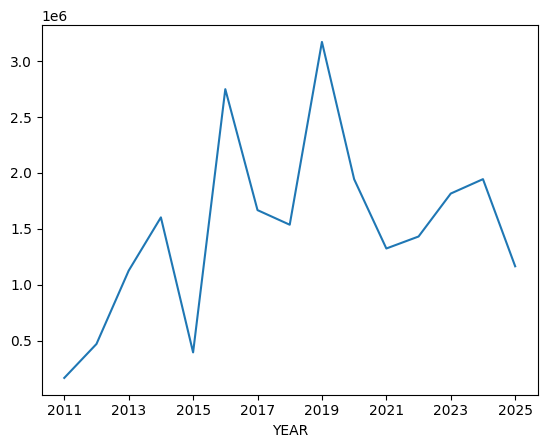

In [116]:
df[df['greenheart_piles'] == True].groupby('YEAR')['GROSS WEIGHT (KG)'].sum().plot()

### The total number of imports containing 'piles' have increased since 2006. The total weight of these shipments have also increased, especially up to 2019. They seem to follow a pattern where bigger shipments are made every other year. (Same with William G. Moore. Why?)

## Creating a sub-dataframe for New York area ports

In [119]:
df['US PORT'].value_counts()

US PORT
New York, New York                          364
New York/Newark Area, Newark, New Jersey    314
Baltimore, Maryland                          36
Miami, Florida                                8
Savannah, Georgia                             6
Port Everglades, Florida                      4
Houston, Texas                                3
West Palm Beach, Florida                      2
Wilmington, Delaware                          2
Philadelphia, Pennsylvania                    1
Name: count, dtype: int64

<Axes: ylabel='US PORT'>

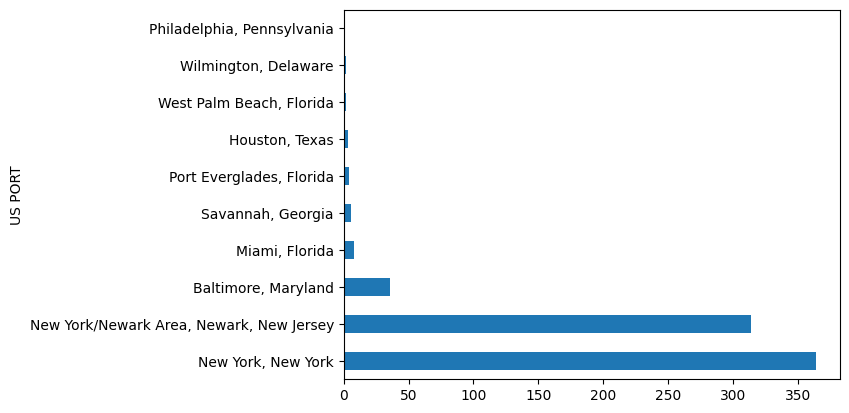

In [121]:
df['US PORT'].value_counts().plot(kind='barh')

### Most imports for Evergreen Forest Products come through New York-area ports

In [122]:
ny = df[df['US PORT'].isin([
    'New York/Newark Area, Newark, New Jersey',
    'Albany, New York',
    'New York, New York'
])]

In [123]:
ny.shape

(678, 71)

<Axes: xlabel='YEAR'>

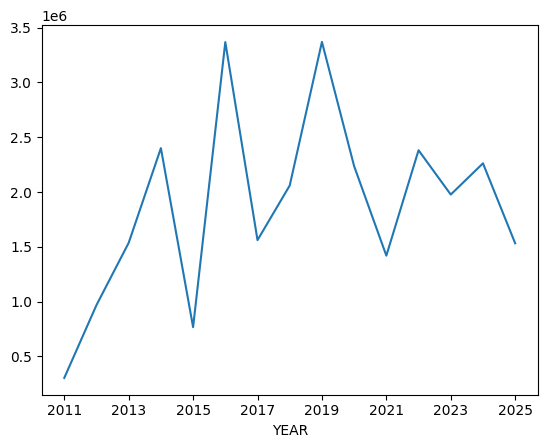

In [126]:
ny[ny['greenheart'] == True].groupby('YEAR')['GROSS WEIGHT (KG)'].sum().plot()

<Axes: xlabel='YEAR'>

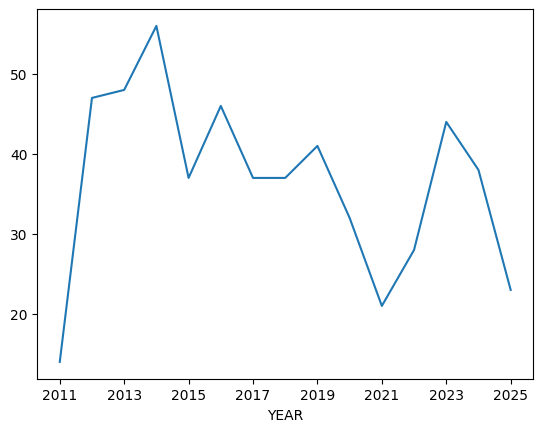

In [127]:
ny[ny['greenheart'] == True].groupby('YEAR').size().plot()

In [128]:
# Create the pivot table: YEAR as index, species as columns, values = count of True values
species_per_year = ny.groupby('YEAR')[species_cols].sum()

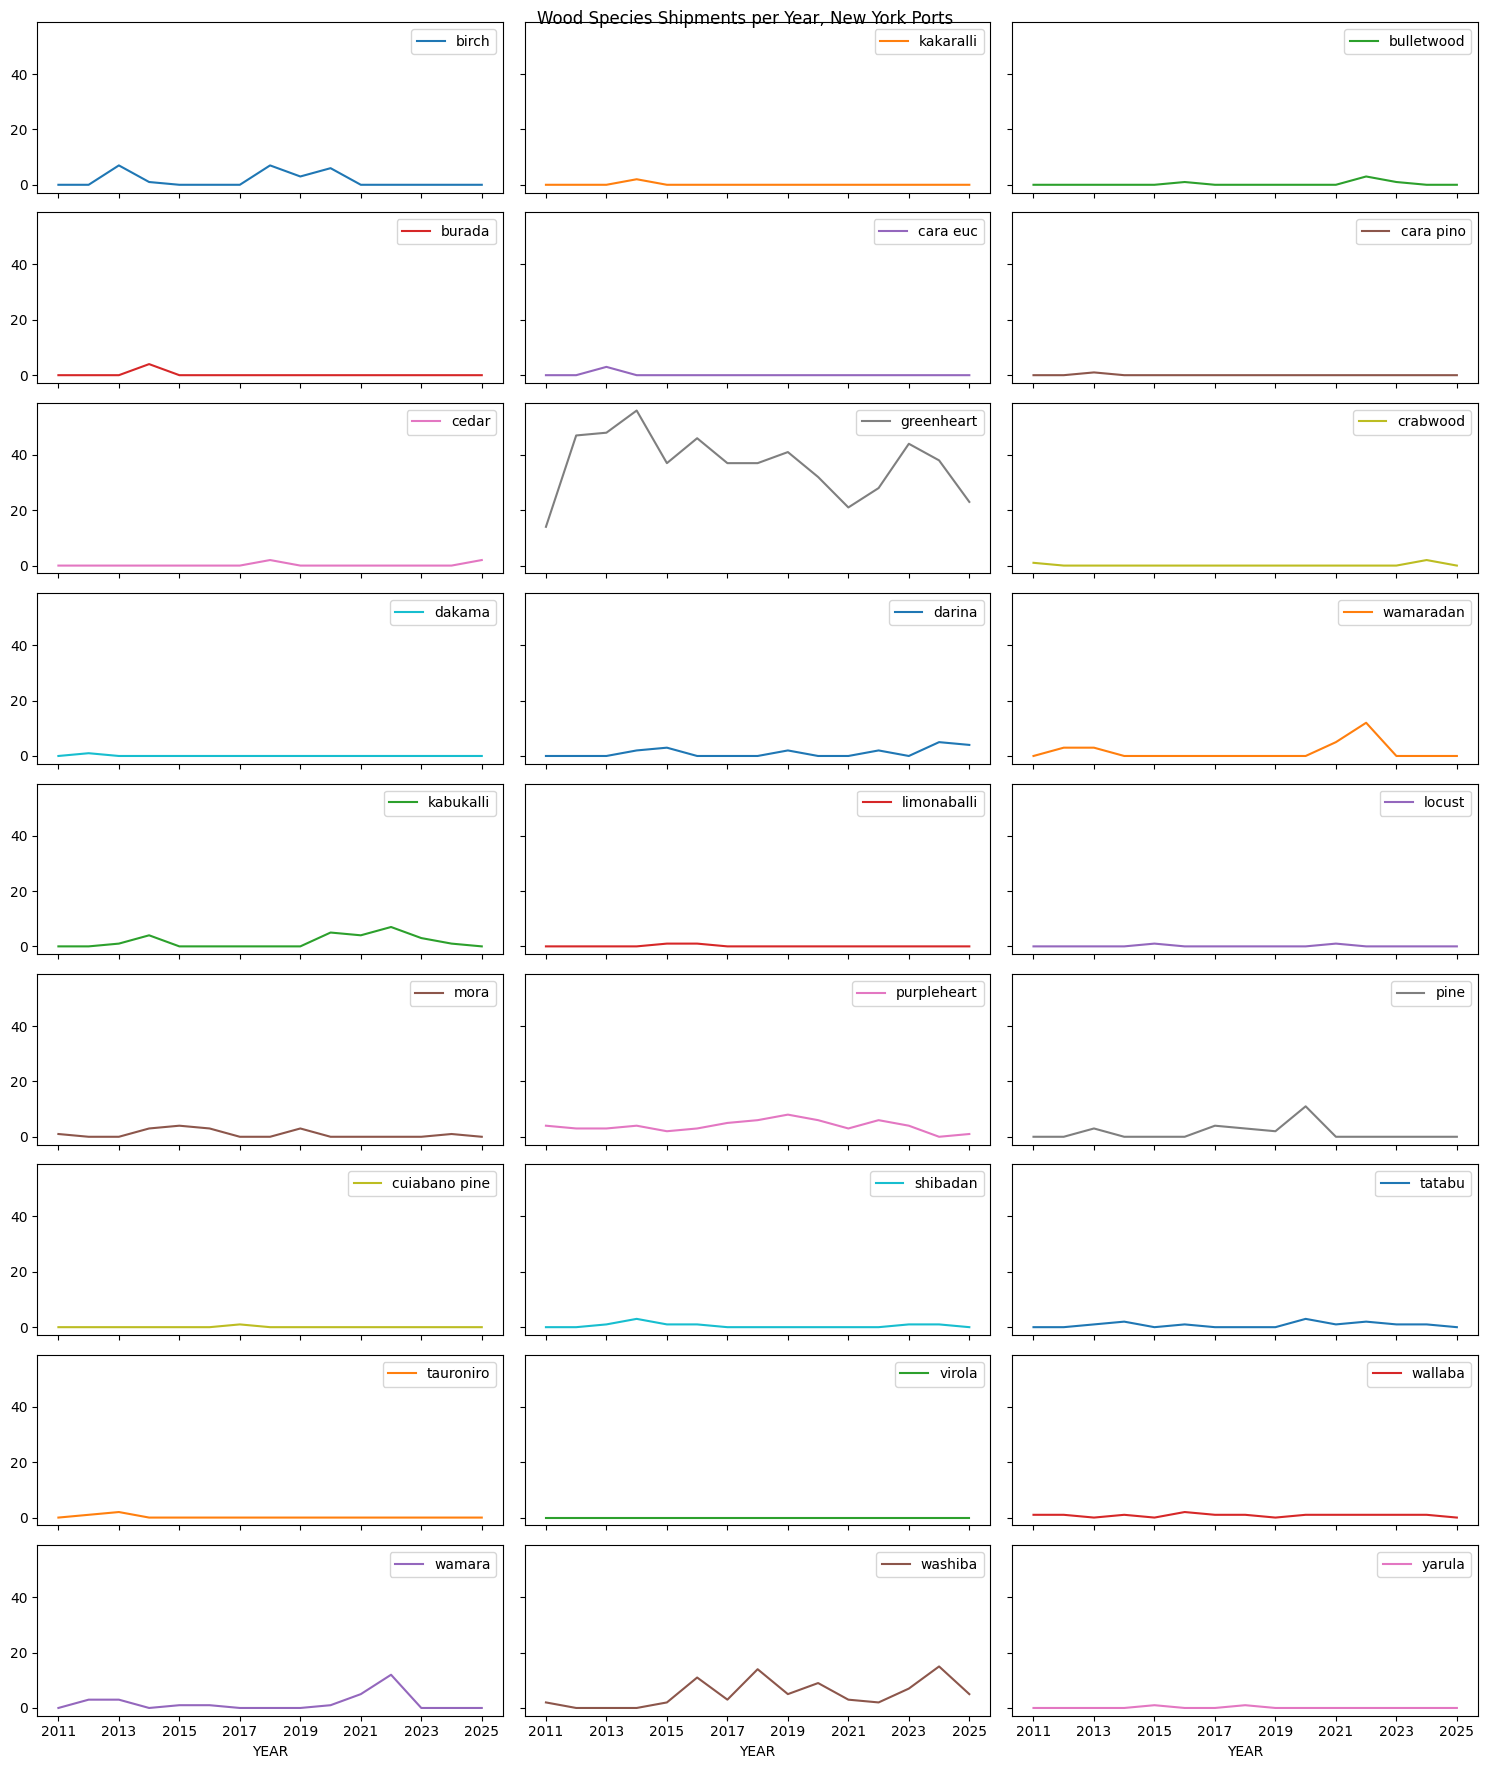

In [130]:
# Create subplots for each species
axes = species_per_year.plot(
    subplots=True,
    layout=(9, 3),  # adjust grid size to fit 17 species (e.g., 6 rows, 3 columns)
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Wood Species Shipments per Year, New York Ports'
)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

### Follow similar trends as the overall data, since NY imports the most

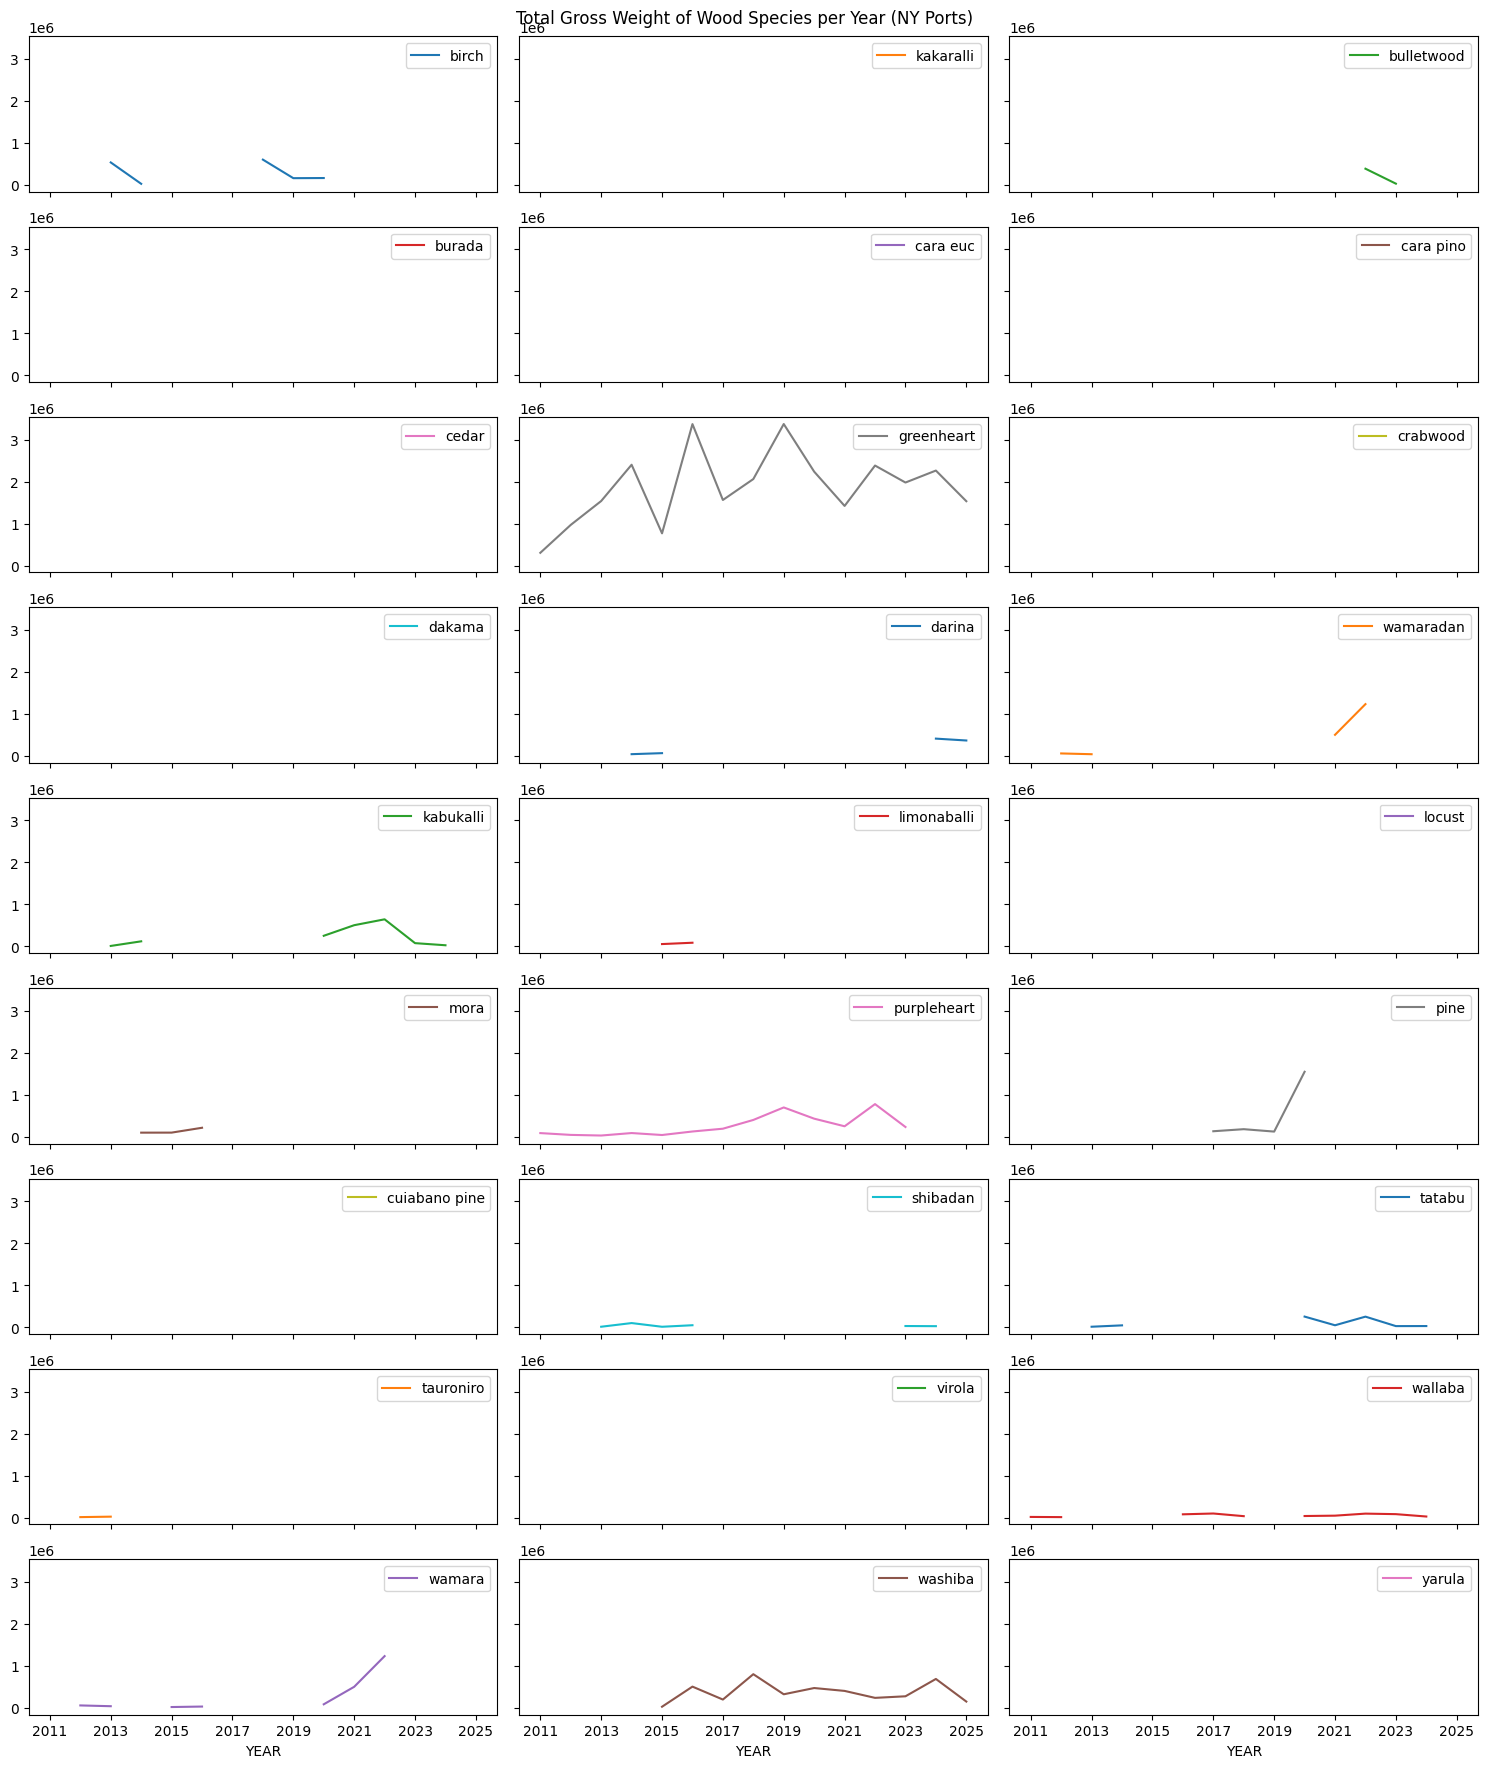

In [132]:
# Dictionary to hold total weights per species per year
species_weight_by_year = {}

# Loop through each species
for species in species_cols:
    species_weight_by_year[species] = ny[ny[species]].groupby('YEAR')['GROSS WEIGHT (KG)'].sum()

# Combine into one DataFrame
weight_per_species = pd.DataFrame(species_weight_by_year)

# Plot each species in a separate subplot
axes = weight_per_species.plot(
    subplots=True,
    layout=(9, 3),  # adjust to fit the number of species
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Total Gross Weight of Wood Species per Year (NY Ports)'
)

plt.tight_layout()
plt.show()

### When looking at weight, greenheart has stayed pretty consistent

## Shipping origin ports per year for New York area ports for greenheart

In [140]:
origin_ports_per_year = ny[ny['greenheart'] == True].pivot_table(
    index='YEAR',
    columns='FOREIGN PORT',
    values='SHIPPER_CLEANED',  # any column name works for counting rows
    aggfunc='size',
    fill_value=0
)

In [141]:
origin_ports_per_year

FOREIGN PORT,All Other Guyana Ports,Caucedo,Demerara,Haina,Linden,Port Bustamante,Puerto Manzanillo
YEAR,,,,,,,
2011,0,0,0,0,0,14,0
2012,0,0,0,0,0,47,0
2013,0,0,4,0,0,44,0
2014,2,0,0,0,0,54,0
2015,0,0,0,3,0,34,0
2016,0,0,0,8,2,36,0
2017,0,0,0,35,0,2,0
2018,0,0,0,16,0,21,0
2019,1,0,0,0,0,40,0


<Axes: xlabel='YEAR'>

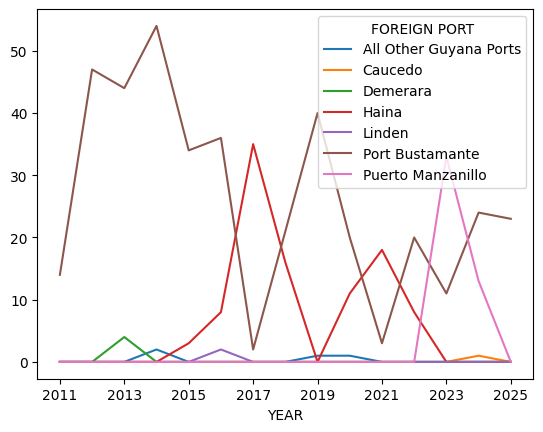

In [142]:
origin_ports_per_year.plot()

In [144]:
shipments_per_shipper_ny = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [145]:
shipments_per_shipper_ny

SHIPPER_CLEANED,Andrade & Martins Ltda,BULKAN TIMBER WORKS INC,Barama Company Limited,COMPENSADOS RELVAPLAC LTDA,Celplac Indústria e Comércio Ltda,Compensados NM Ltda,Cummings Wood Products,Deoraj Singh Sawmill,Doodnauth Naipaul,Durable Wood Products Enterprises,EMERALD FOREST INC,Evergreen Forest Products,Forest Woods Inc.,G Mahase & Mahase Lumber Supplier,G13 Madeiras Ltda,GREEN LINE PRODUCTS ENTERPRISE INC,Ganshyam Mahase,Ganshyam Mahase Sawmill and Lumber,Green Line Products Enterprise Inc.,Green Link International Corp,Guyana Furniture Manufacturing Ltd.,Guylog,Hebei Shuowei Machinery Equipment Co.,Ituni Small Loggers Association,LINYI JIAHE WOOD INDUSTRY COLTD,Linyi Baideli International Trade,MALLALI AMERINDIAN VILLAGE COUNCIL,Madeireira Rio Claro Ltda,Marini Indústria de Compensados Ltda,Nazir Tropical Timbers,PLACA COM DE MAD E COMPLTDA,Paradise Woods,Pinustan Indústria e Comércio de Madeiras,Prestige Timbers Inc,Puruni Wood Products Inc,R & H Jaisingh,RANDA IND E COM PORTAS E,RANDA IND E COM PORTAS E COM,RANDA INDE COMPORTAS ECOMPENSADOS,Randa Indústria e Comércio de Portas,Rondônia Rural Agroindustrial Ltda,S & K Lumber Enterprise,SUSTAINABLE FOREST PRODUCTS INC,Shandong Huaxin Jiasheng Wood,Southern Timber Exports,Superior Woods,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Upper Berbice Forest,Variety Woods & Greenheart,WEYERHAEUSER PRODUCTOS SA,WEYERHAEUSER URUGUAY SA,Widevelop Int Ltd
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,0,1,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,15,10,1,0,0,0,1
2013,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,1,2,0,0,0,0,0,1,0,0,1,24,0,0,0,0,0,0,0,1,0,0,0,19,0,3,5,1,0
2014,0,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,3,0,0,0,6,0,0,0,0,0,0,8,1,0,1,0,21,0,9,0,0,0
2015,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0
2017,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2018,6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,41,0,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
2019,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T/ipykernel_35129/4184704311.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', num_companies)


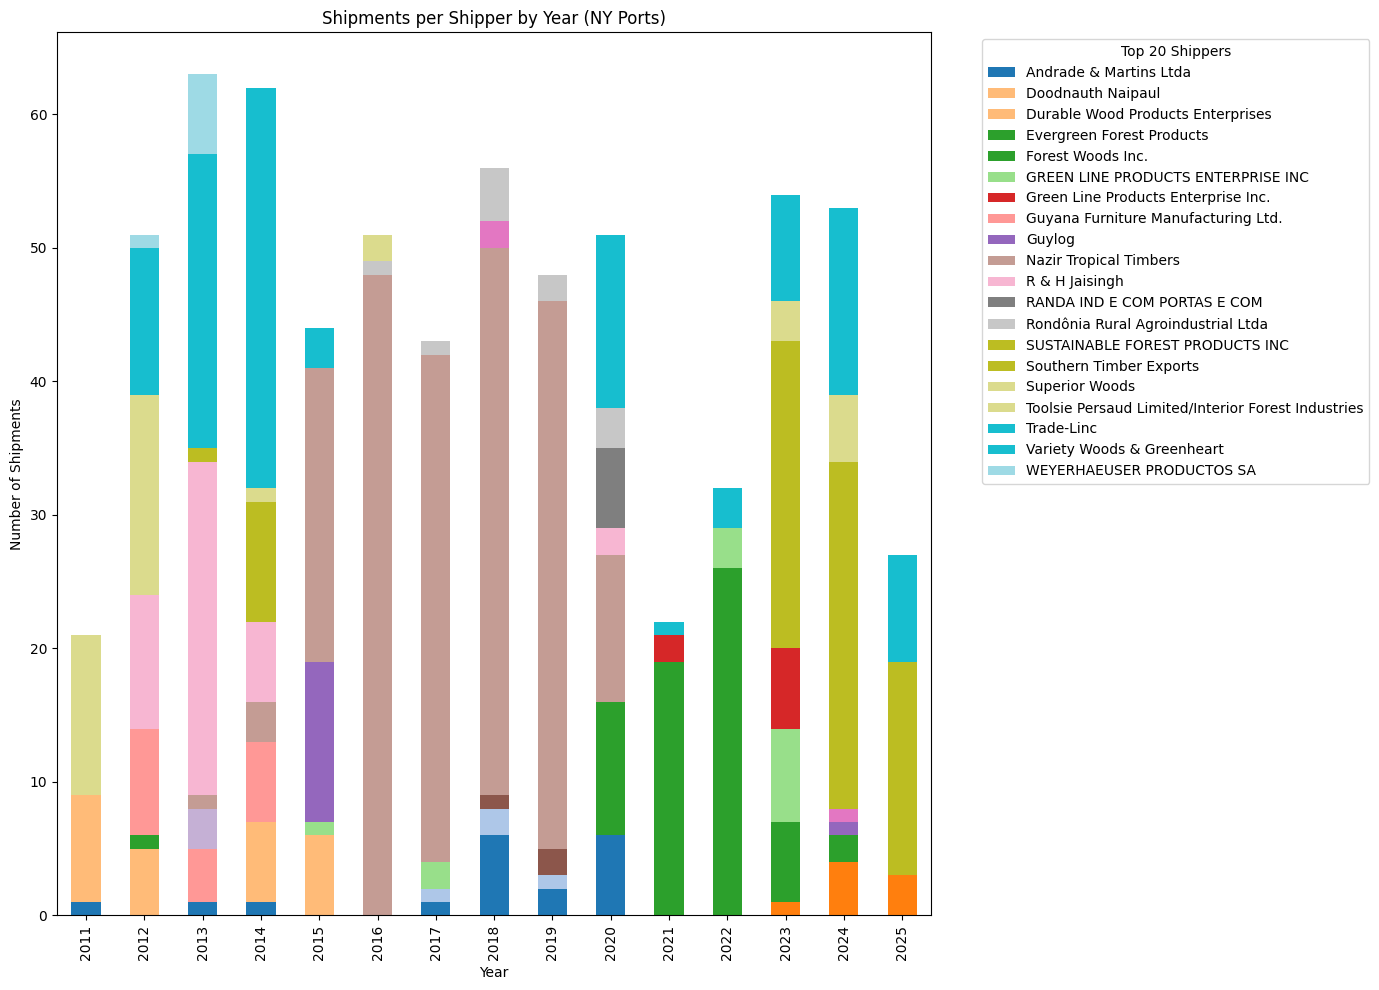

In [155]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex

# Get total shipments per company and select top 20
total_shipments = shipments_per_shipper_ny.sum()
top_20_shippers = total_shipments.sort_values(ascending=False).head(20).index

# Assign a color to each company
num_companies = shipments_per_shipper_ny.shape[1]
cmap = get_cmap('tab20', num_companies)
colors = [to_hex(cmap(i)) for i in range(num_companies)]

# Plot and get bar containers
ax = shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 10),
    color=colors,
    legend=False  # We'll add legend manually
)

# Manually add legend only for top 20
handles, labels = ax.get_legend_handles_labels()
top_handles_labels = [
    (h, l) for h, l in zip(handles, labels) if l in top_20_shippers
]

# Remove duplicates and preserve order of top 20
seen = set()
top_handles_labels = [
    (h, l) for h, l in top_handles_labels if not (l in seen or seen.add(l))
]

# Unzip
top_handles, top_labels = zip(*top_handles_labels)

# Add legend
ax.legend(top_handles, top_labels, title='Top 20 Shippers', bbox_to_anchor=(1.05, 1), loc='upper left')

# Final plot adjustments
plt.title('Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

In [156]:
shipments_per_shipper_ny_weight = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [157]:
shipments_per_shipper_ny_weight

SHIPPER_CLEANED,Andrade & Martins Ltda,BULKAN TIMBER WORKS INC,Barama Company Limited,COMPENSADOS RELVAPLAC LTDA,Celplac Indústria e Comércio Ltda,Compensados NM Ltda,Cummings Wood Products,Deoraj Singh Sawmill,Doodnauth Naipaul,Durable Wood Products Enterprises,EMERALD FOREST INC,Evergreen Forest Products,Forest Woods Inc.,G Mahase & Mahase Lumber Supplier,G13 Madeiras Ltda,GREEN LINE PRODUCTS ENTERPRISE INC,Ganshyam Mahase,Ganshyam Mahase Sawmill and Lumber,Green Line Products Enterprise Inc.,Green Link International Corp,Guyana Furniture Manufacturing Ltd.,Guylog,Hebei Shuowei Machinery Equipment Co.,Ituni Small Loggers Association,LINYI JIAHE WOOD INDUSTRY COLTD,Linyi Baideli International Trade,MALLALI AMERINDIAN VILLAGE COUNCIL,Madeireira Rio Claro Ltda,Marini Indústria de Compensados Ltda,Nazir Tropical Timbers,PLACA COM DE MAD E COMPLTDA,Paradise Woods,Pinustan Indústria e Comércio de Madeiras,Prestige Timbers Inc,Puruni Wood Products Inc,R & H Jaisingh,RANDA IND E COM PORTAS E,RANDA IND E COM PORTAS E COM,RANDA INDE COMPORTAS ECOMPENSADOS,Randa Indústria e Comércio de Portas,Rondônia Rural Agroindustrial Ltda,S & K Lumber Enterprise,SUSTAINABLE FOREST PRODUCTS INC,Shandong Huaxin Jiasheng Wood,Southern Timber Exports,Superior Woods,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Upper Berbice Forest,Variety Woods & Greenheart,WEYERHAEUSER PRODUCTOS SA,WEYERHAEUSER URUGUAY SA,Widevelop Int Ltd
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,0,30048,0,0,0,0,0,0,0,141134,24621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71089,204126,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,79031,0,10364,0,0,0,0,0,0,0,0,204476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186403,0,0,0,0,0,0,0,0,0,0,289327,223945,10742,0,0,0,26000
2013,0,0,11991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103680,21409,0,0,0,25760,285120,0,0,0,0,0,50000,0,0,10682,377270,0,0,0,0,0,0,0,106036,0,0,0,1006361,0,92141,151680,124570,0
2014,0,0,12155,0,0,0,0,0,236258,0,0,0,0,0,0,0,0,0,0,0,66686,0,0,0,0,0,0,0,0,0,0,371872,0,0,0,82381,0,0,0,0,0,0,100300,23564,0,20041,0,1191371,0,380103,0,0,0
2015,0,0,0,0,0,0,0,0,136514,0,0,0,0,11682,0,0,0,0,0,0,0,202417,0,7868,0,0,0,0,0,480442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37865,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3433063,0,0,0,0,0,0,0,0,0,0,0,20112,0,0,0,46658,0,0,0,0,0,0,0
2017,12421,0,0,55200,0,0,0,0,0,0,0,0,0,0,50900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1561849,26149,0,0,0,0,0,0,0,0,0,13626,0,0,0,0,0,0,0,0,0,0,0,0
2018,516871,0,0,82500,25400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14560,0,0,2174235,0,0,155800,0,0,0,0,0,0,0,101808,0,0,0,0,0,0,0,0,0,0,0,0
2019,137420,0,0,0,0,25559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20502,98376,3370181,0,0,0,0,0,0,0,0,0,0,50502,0,0,0,0,0,0,0,0,0,0,0,0


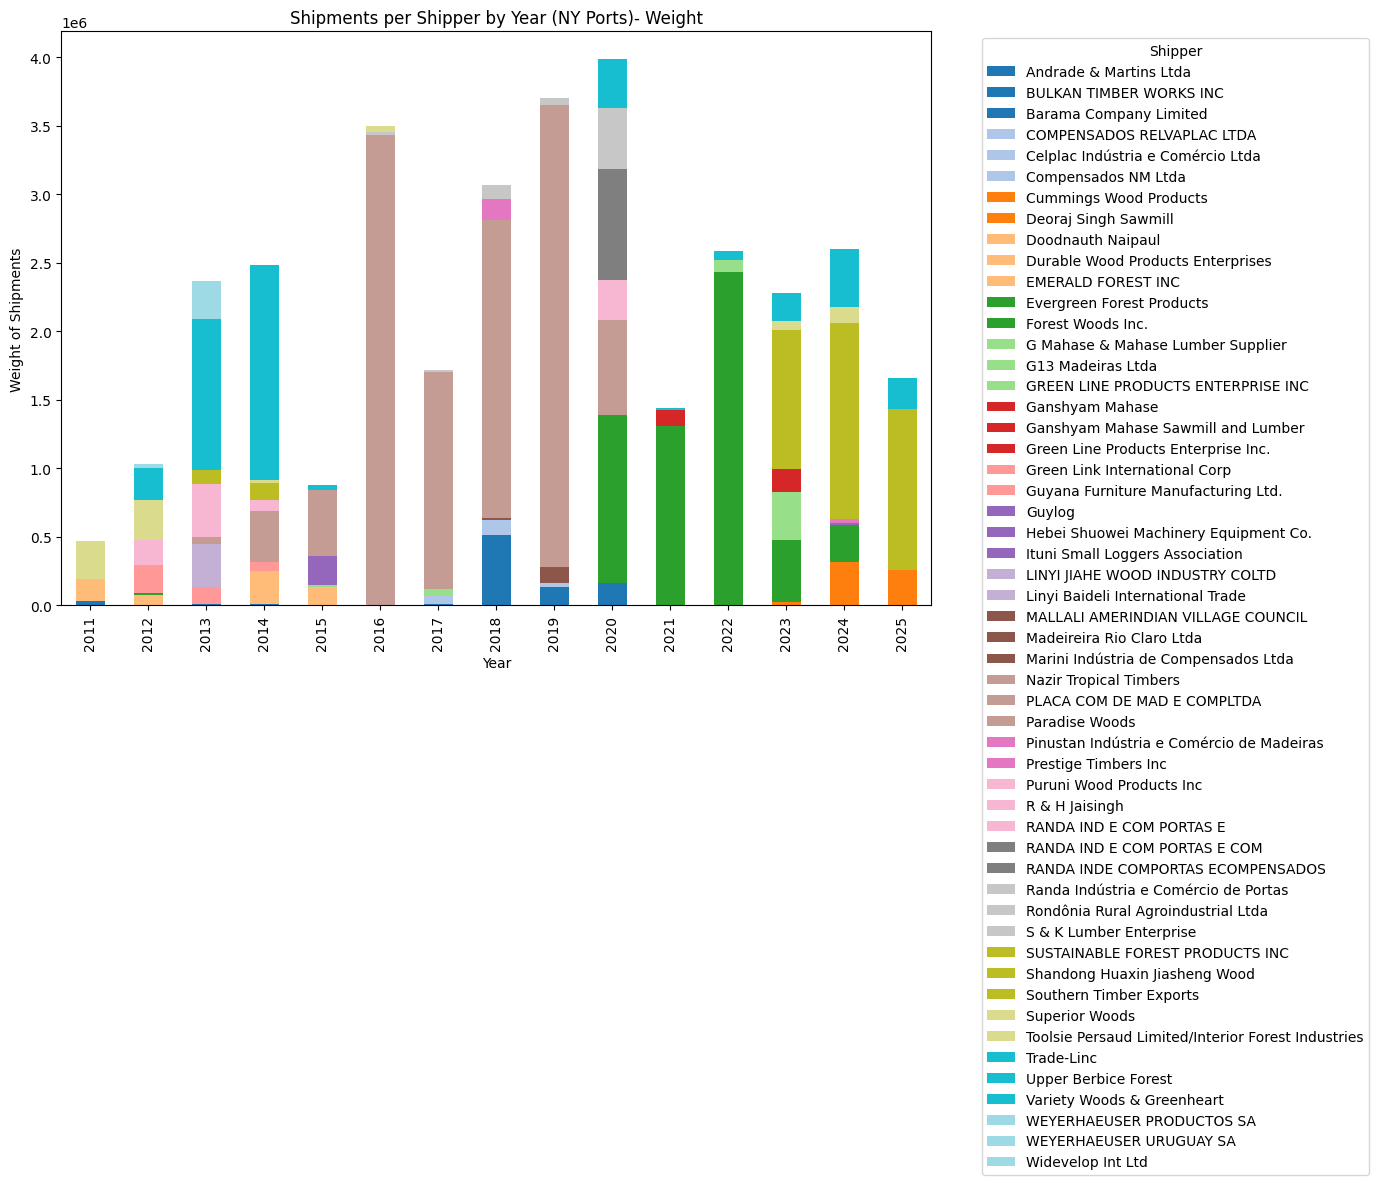

In [159]:
shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 10),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Shipments per Shipper by Year (NY Ports)- Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### DOT's imports through Nazir Tropical Timbers made up the bulk of the company's imports from 2016-2020

## Greenheart shipments per shipper - New York ports

In [160]:
greenheart_shipments_per_shipper_ny = ny[ny['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [161]:
greenheart_shipments_per_shipper_ny

SHIPPER_CLEANED,Deoraj Singh Sawmill,Doodnauth Naipaul,Durable Wood Products Enterprises,Evergreen Forest Products,Forest Woods Inc.,GREEN LINE PRODUCTS ENTERPRISE INC,Ganshyam Mahase,Ganshyam Mahase Sawmill and Lumber,Green Line Products Enterprise Inc.,Guyana Furniture Manufacturing Ltd.,Guylog,Nazir Tropical Timbers,Paradise Woods,Puruni Wood Products Inc,R & H Jaisingh,SUSTAINABLE FOREST PRODUCTS INC,Southern Timber Exports,Superior Woods,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Upper Berbice Forest,Variety Woods & Greenheart
YEAR,,,,,,,,,,,,,,,,,,,,,,
2011,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0
2012,0,0,4,1,0,0,0,0,0,8,0,0,0,0,9,0,0,0,15,9,1,0
2013,0,0,0,0,0,0,0,0,0,2,0,0,1,1,24,0,0,0,0,17,0,3
2014,0,5,0,0,0,0,0,0,0,6,0,0,3,0,6,8,0,1,0,20,0,7
2015,0,5,0,0,0,0,0,0,0,0,8,21,0,0,0,0,0,0,0,3,0,0
2016,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,2,0,0,0,0
2017,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0


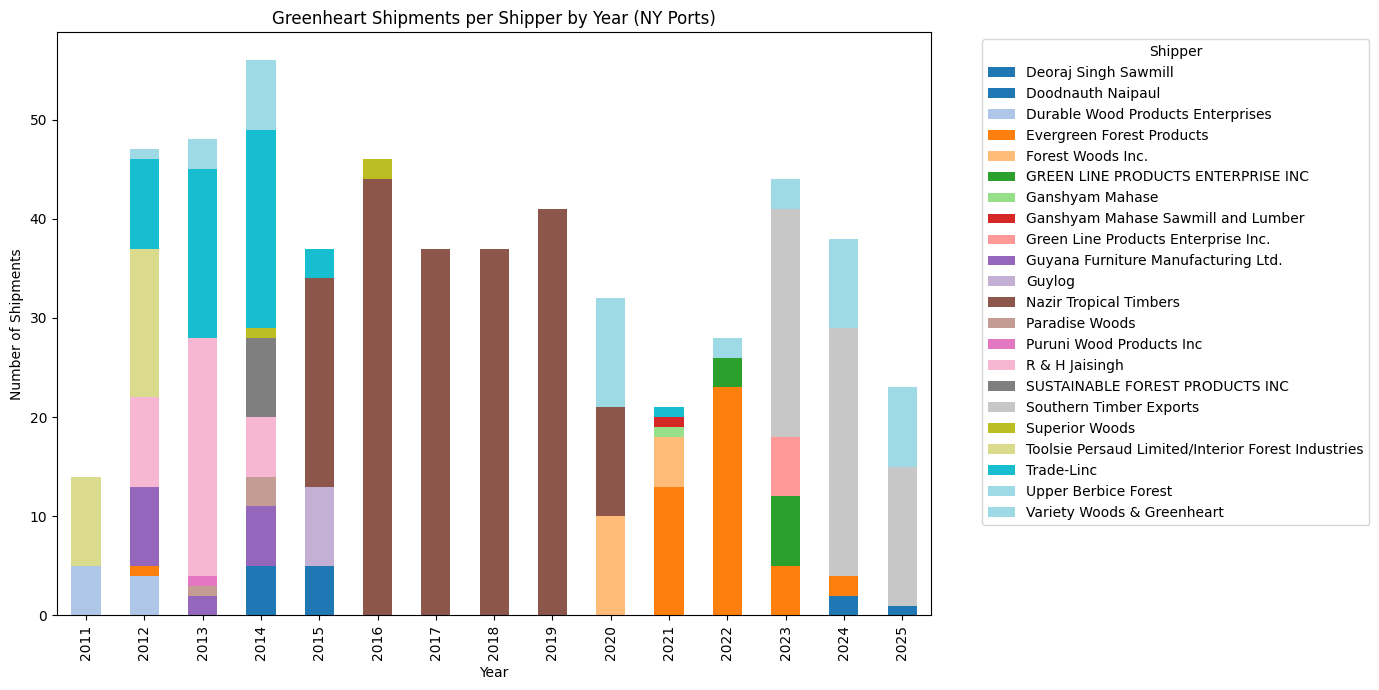

In [162]:
greenheart_shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Greenheart Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### The company still imports a large amount of greenheart to New York ports. Suppliers have changed over the years. Most recently, Southern Timber Exports supplies a lot. Previously Evergreen Forest Products (same as the importing company?) and earlier, Nazir. Many other companies as well

In [163]:
greenheart_shipments_per_shipper_ny_weight = ny[ny['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [164]:
greenheart_shipments_per_shipper_ny_weight

SHIPPER_CLEANED,Deoraj Singh Sawmill,Doodnauth Naipaul,Durable Wood Products Enterprises,Evergreen Forest Products,Forest Woods Inc.,GREEN LINE PRODUCTS ENTERPRISE INC,Ganshyam Mahase,Ganshyam Mahase Sawmill and Lumber,Green Line Products Enterprise Inc.,Guyana Furniture Manufacturing Ltd.,Guylog,Nazir Tropical Timbers,Paradise Woods,Puruni Wood Products Inc,R & H Jaisingh,SUSTAINABLE FOREST PRODUCTS INC,Southern Timber Exports,Superior Woods,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Upper Berbice Forest,Variety Woods & Greenheart
YEAR,,,,,,,,,,,,,,,,,,,,,,
2011,0,0,100394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204126,0,0,0
2012,0,0,65793,10364,0,0,0,0,0,204476,0,0,0,0,175089,0,0,0,289327,213200,10742,0
2013,0,0,0,0,0,0,0,0,0,21409,0,0,50000,10682,377270,0,0,0,0,985643,0,92141
2014,0,218435,0,0,0,0,0,0,0,66686,0,0,371872,0,82381,100300,0,20041,0,1182598,0,358623
2015,0,125914,0,0,0,0,0,0,0,0,134601,469487,0,0,0,0,0,0,0,37865,0,0
2016,0,0,0,0,0,0,0,0,0,0,0,3321767,0,0,0,0,0,46658,0,0,0,0
2017,0,0,0,0,0,0,0,0,0,0,0,1561849,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0,0,0,0,2060119,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,0,3370181,0,0,0,0,0,0,0,0,0,0


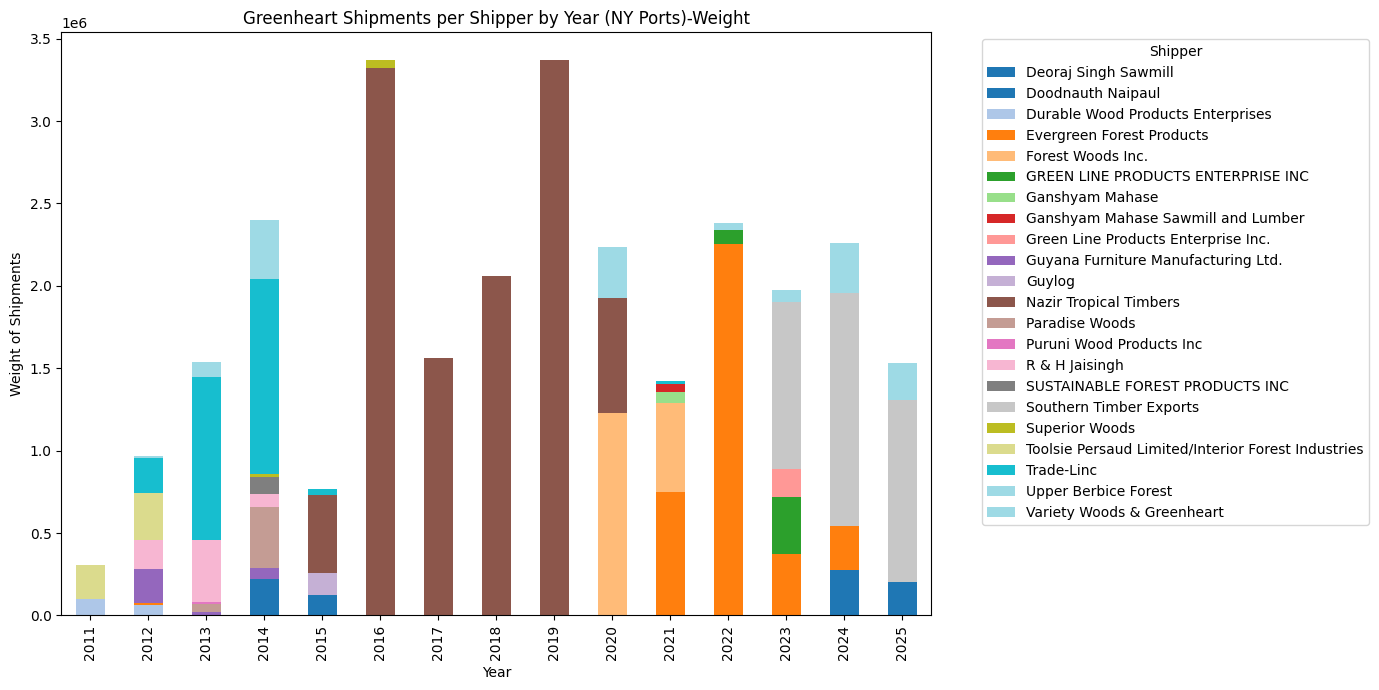

In [165]:
greenheart_shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Greenheart Shipments per Shipper by Year (NY Ports)-Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### DOT's imports weighed more than a lot of the other imports